# Feature Importance Example - Linear Regression & Support Vector Machine (SVM)

This is the notebook associated with the Medium article INSERT MEDIUM ARTICLE LINK HERE.

In this notebook, we will use a real-life example project to provide insight into how easy it is to get feature importance for Linear Regression and Support Vector Machines.

This approach is also applicable to ridge and lasso regression, but I will not be covering that here.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split 

import random

import sys
sys.path.append('..')

# custom module
from utils.data_creation import make_synthetic_tabular_data
from utils.plotting import get_cmap

In [2]:
from matplotlib import colors
c = colors.CSS4_COLORS

In [3]:
n_rows = 1000
n_cols = 10
x, y, scales = make_synthetic_tabular_data(n_rows,n_cols,True)
colors = [list(c.keys())[i+10] for i in range(n_cols)]

In [4]:
scales

{0: 13, 1: 7, 2: 1, 3: 5, 4: 9, 5: 8, 6: 14, 7: 10, 8: 3, 9: 4}

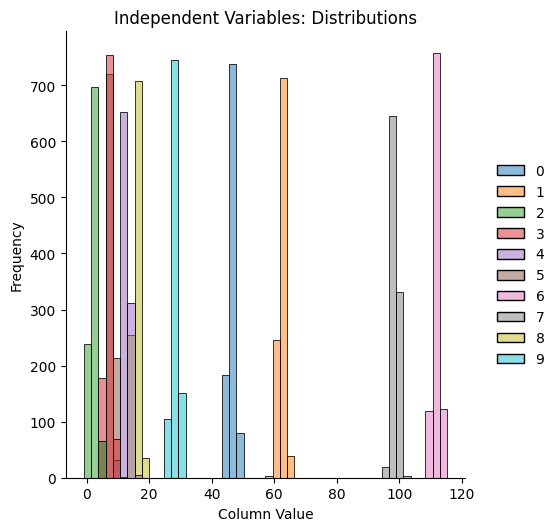

In [36]:
sns.displot(x, bins=50)
plt.title("Independent Variables: Distributions")
plt.xlabel("Column Value")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:>

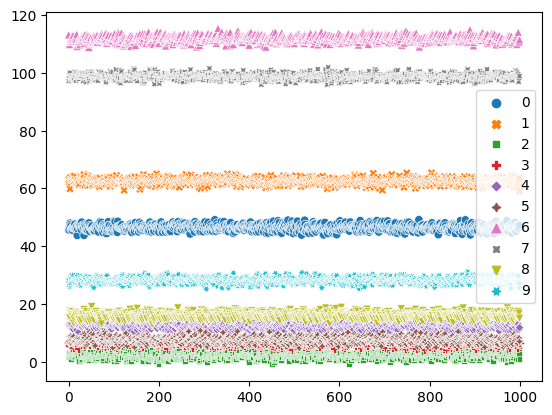

In [37]:
sns.scatterplot(x)

<AxesSubplot:>

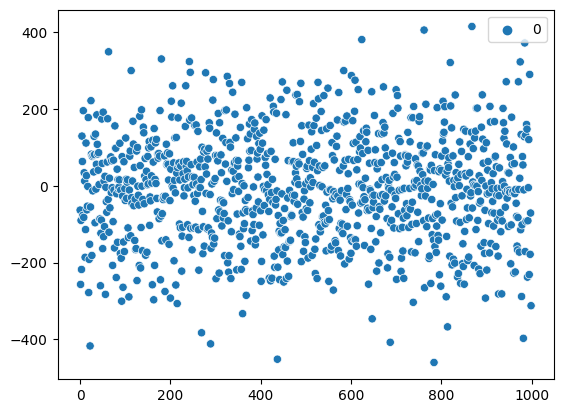

In [38]:
sns.scatterplot(y)

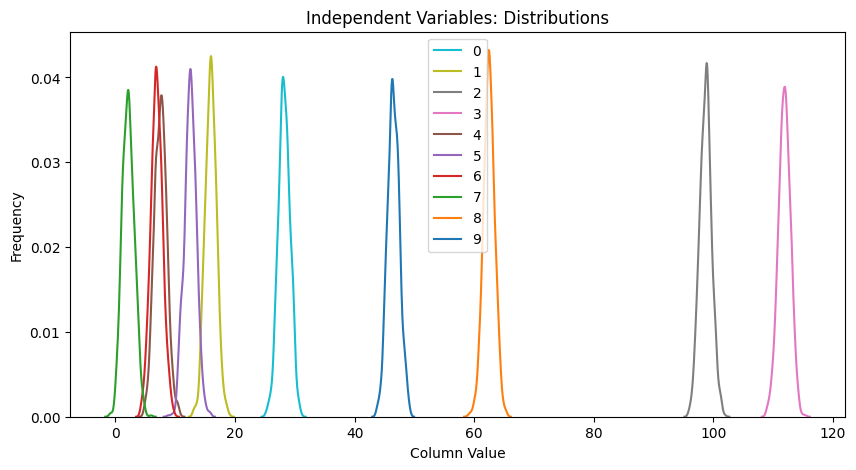

In [8]:
plt.figure(figsize=[10,5])
sns.kdeplot(x)
plt.legend(x.columns)
plt.title("Independent Variables: Distributions")
plt.xlabel("Column Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
y

,0
0,-63.406616
1,-256.730305
2,-90.213766
3,-217.840005
4,129.131140
...,...
995,-231.178579
996,289.532336
997,-178.490960
998,-71.023251


Text(0, 0.5, 'Column Mean Value')

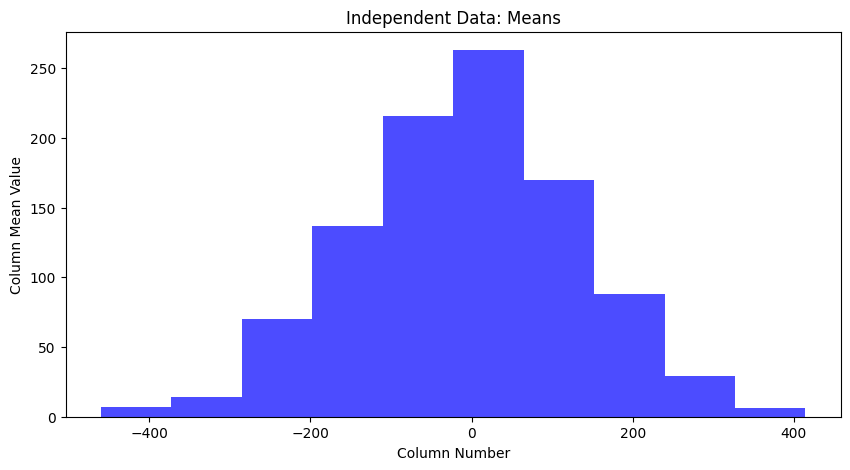

In [10]:
plt.figure(figsize=[10,5])
plt.hist(y, alpha=0.7, bins=10, color='blue')
plt.title("Independent Data: Means")
plt.xlabel("Column Number")
plt.ylabel("Column Mean Value")


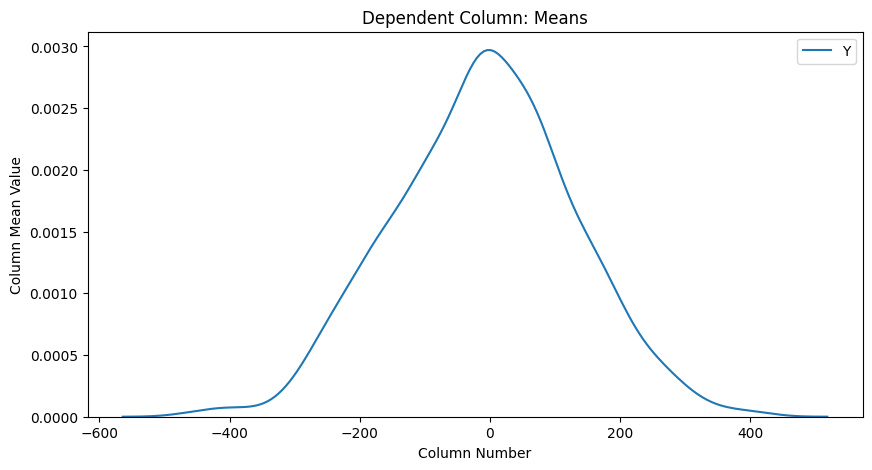

In [11]:
plt.figure(figsize=[10,5])
sns.kdeplot(y)
plt.title("Dependent Column: Means")
plt.xlabel("Column Number")
plt.ylabel("Column Mean Value")
plt.legend(['Y'])

Text(0, 0.5, 'Column Mean Value')

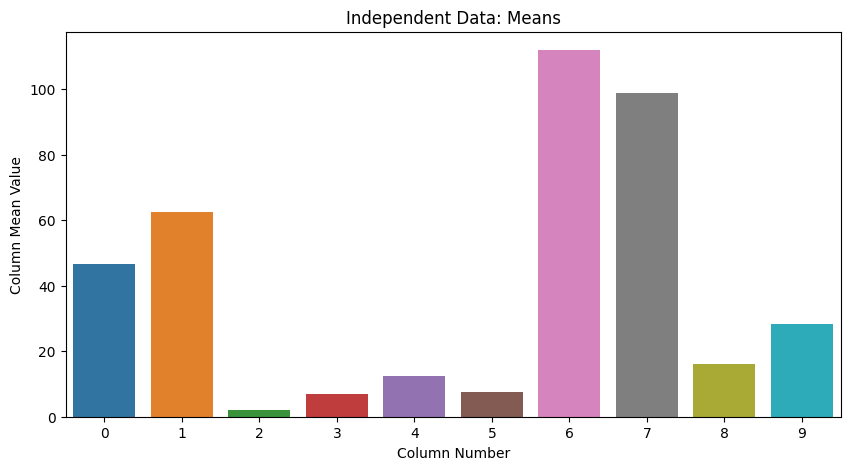

In [45]:
means = {}
for col in x.columns:
    means[col] = x[col].mean()
    
plt.figure(figsize=[10,5])
sns.barplot(x=list(means.keys()), y=list(means.values()))
plt.xticks(list(means.keys()))
plt.title("Independent Data: Means")
plt.xlabel("Column Number")
plt.ylabel("Column Mean Value")


# Modeling 

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()#StandardScaler(with_mean=True, with_std=True)
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

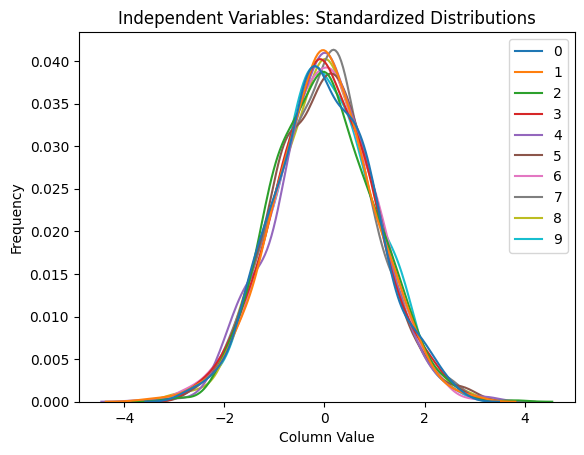

In [14]:
sns.kdeplot(x_scaled)
plt.title("Independent Variables: Standardized Distributions")
plt.xlabel("Column Value")
plt.ylabel("Frequency")
plt.show()

### Linear Regression
Note: This is also applicable for Lasso, Ridge regression.

In [15]:
lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.9998234970967833

In [16]:
lr_scaled = LinearRegression()
lr_scaled.fit(x_scaled, y_scaled)
lr_scaled.score(x_scaled, y_scaled)

0.9998234970967833

In [17]:
lr.coef_

array([[44.01984581, 33.68199304,  8.45632655, 73.20616163, 52.4638741 ,
         9.64242257, 63.30846261, 13.56747424, 69.57521678, 40.09650572]])

In [18]:
lr_scaled.coef_

array([[0.31513252, 0.23259712, 0.06150261, 0.51605712, 0.37930339,
        0.07090316, 0.46188205, 0.09725852, 0.47632098, 0.28491116]])

### Support Vector Machine (SVM)
This approach is only valid for linear and RBF SVN kernels.

In [19]:
svm = SVR(kernel='linear')
svm.fit(x, y)
svm.score(x, y)

c:\Users\Taylo\anaconda3\envs\regression-svm-feature-importance\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.99981705992095

In [20]:
svm_scaled = SVR(kernel='linear')
svm_scaled.fit(x_scaled, y_scaled)
svm_scaled.score(x_scaled, y_scaled)

c:\Users\Taylo\anaconda3\envs\regression-svm-feature-importance\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9984677478377983

<AxesSubplot:>

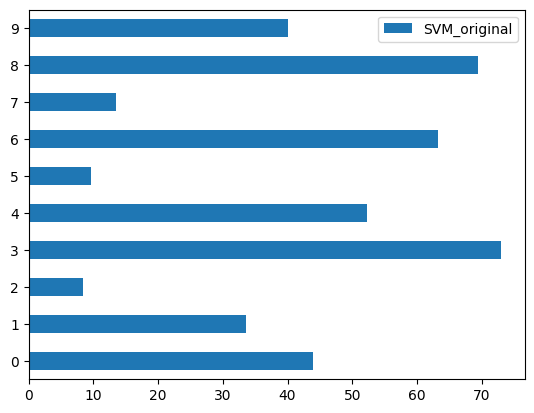

In [21]:
pd.DataFrame(svm.coef_.T, columns=['SVM_original']).plot(kind='barh')

<AxesSubplot:>

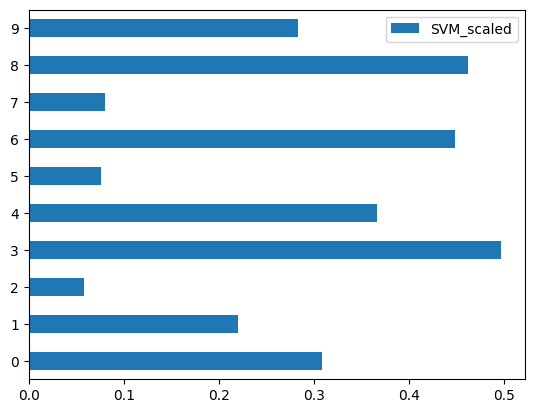

In [22]:
pd.DataFrame(svm_scaled.coef_.T, columns=['SVM_scaled']).plot(kind='barh')

#### RBF Kernel

In [32]:
from sklearn.inspection import permutation_importance

Text(0.5, 1.0, 'Permutation Feature Importance')

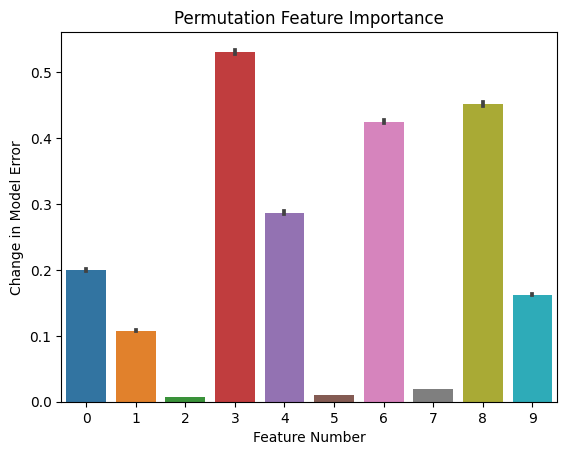

In [35]:
premu = permutation_importance(svm, x, y, n_repeats=100, n_jobs=-1, random_state=0)
sns.barplot(premu.importances.T)
plt.ylabel("Change in Model Error")
plt.xlabel("Feature Number")
plt.title("Permutation Feature Importance")

In [102]:
permu_scaled = permutation_importance(lr, x_scaled, y_scaled, n_repeats=100, n_jobs=-1, random_state=0)

Text(0.5, 1.0, 'Permutation Feature Importance')

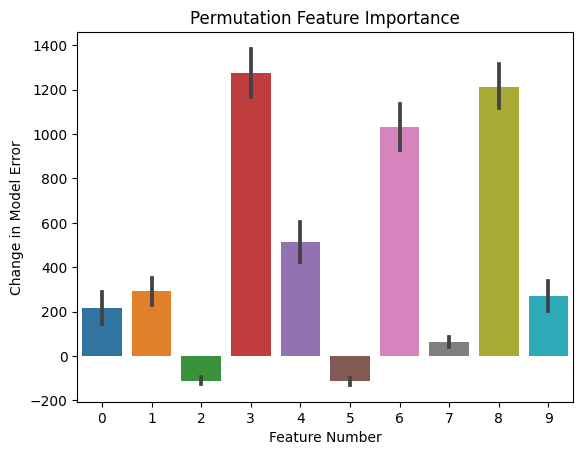

In [103]:
sns.barplot(permu_scaled.importances.T)
plt.ylabel("Change in Model Error")
plt.xlabel("Feature Number")
plt.title("Permutation Feature Importance")